In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
108/129 [========================>.....] - ETA: 0s - loss: 3.1512 - accuracy: 0.0642
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
129/129 [==============================] - 1s 5ms/step - loss: 3.1266 - accuracy: 0.0725 - val_loss: 2.9089 - val_accuracy: 0.1228
Epoch 2/1000
117/129 [==========================>...] - ETA: 0s - loss: 2.8518 - accuracy: 0.1442
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
129/129 [==============================] - 0s 4ms/step - loss: 2.8398 - accuracy: 0.1480 - val_loss: 2.5468 - val_accuracy: 0.2441
Epoch 3/1000
127/129 [============================>.] - ETA: 0s - loss: 2.6132 - accuracy: 0.1918
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
129/129 [==============================] - 0s 3ms/step - loss: 2.6120 - accuracy: 0.1920 - val_loss: 2.2544 - val_accuracy: 0.3651
Epoch 4/1000
111/129 [========================>.....] - ETA: 0s - loss: 2.4514 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

43/43 [==============================] - 0s 1ms/step - loss: 1.0234 - accuracy: 0.6967


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 104ms/step
[2.64956262e-02 2.64904019e-03 7.04451289e-04 6.82523055e-03
 5.45608662e-02 1.44013250e-03 2.47895568e-05 1.37243424e-05
 4.88382727e-02 2.12675016e-02 1.11802923e-03 7.67510501e-04
 1.15519091e-04 9.76820083e-05 2.67409394e-03 6.56266081e-08
 1.85950398e-06 1.21355252e-02 1.93877727e-01 1.15808584e-01
 7.93578685e-04 1.39574439e-03 2.57447300e-05 2.86435157e-01
 2.00188786e-01 2.17448026e-02]
23


# Confusion matrix

172/172 [==============================] - 0s 1ms/step


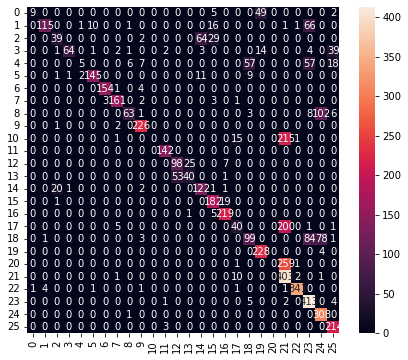

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.14      0.24        65
           1       0.96      0.55      0.69       211
           2       0.62      0.29      0.40       134
           3       0.97      0.49      0.65       131
           4       0.62      0.03      0.06       150
           5       0.92      0.86      0.89       169
           6       0.98      0.97      0.97       159
           7       0.93      0.95      0.94       170
           8       0.88      0.34      0.49       183
           9       0.91      0.99      0.95       229
          10       0.00      0.00      0.00       232
          11       0.96      1.00      0.98       142
          12       0.65      0.75      0.70       130
          13       0.61      0.43      0.50        94
          14       0.61      0.83      0.70       147
          15       0.76      0.90      0.82       202
          16       0.89      0.97      0.93       225
     

c:\Users\Chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Chidi\AppData\Local\Temp\tmp1yunnvww\assets


7456

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.64956355e-02 2.64903717e-03 7.04450940e-04 6.82522776e-03
 5.45609035e-02 1.44013250e-03 2.47894932e-05 1.37243223e-05
 4.88382503e-02 2.12674886e-02 1.11802761e-03 7.67509395e-04
 1.15518968e-04 9.76818701e-05 2.67409626e-03 6.56263879e-08
 1.85949921e-06 1.21355150e-02 1.93877846e-01 1.15808584e-01
 7.93576648e-04 1.39574101e-03 2.57447173e-05 2.86435008e-01
 2.00188726e-01 2.17447951e-02]
23
